# Strojno i duboko učenje - Postojece duboke neuronske mreze

#Transferno učenje

**Transferno učenje:** uključuje korištenje unaprijed treniranog modela kao baze i prilagođavanje modela novom zadatku

Neke od najpoznatijih možemo pronaci i u kerasu: [Module: tf.keras.applications](https://www.tensorflow.org/api_docs/python/tf/keras/applications)

* efficientnet
* inception
* inception
* mobilenet
* resnet
* vgg

##Učitavanje potrebnih biblioteka

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.utils import to_categorical

##Učitavanje i prilagođavnje podataka

**Promjena dimenzija slika**: ResNet50 očekuje ulazne slike dimenzija 224x224, stoga mijenjamo dimenzije slika

**Predobrada podataka:** ResNet50 zahtijeva posebnu predobradu ulaznih podataka, što radimo zadanom funkcijom preprocess_input.

In [2]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [3]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:100]
y_test = y_test[:100]

In [4]:
#dimenzije za Resnet
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))

#Predobrada podataka
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

#One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

##Treniranje modela - ResNet50

**Transferno učenje:**
Uklanjanjem klasifikacijskog sloja, koristimo predtrenirane konvolucijske slojeve koji su već naučili korisne značajke iz velikog skupa podataka (ImageNet) i dodajemo slojeve koji omogućuju modelu da nauči specifične značajke našeg manjeg skupa podataka (CIFAR-10)

**Različit broj klasa:**

Unaprijed trenirani modeli, poput ResNet50, trenirani su na skupu podataka ImageNet koji sadrži 1000 klasa.
CIFAR-10 ima samo 10 klasa. Dakle, klasifikacijski sloj treniran na 1000 klasa nije primjenjiv na CIFAR-10 podacima. Skidanje klasifikacijskog sloja (include top) omogućuje nam da dodamo nove slojeve koji su specifični za naš zadatak. To uključuje dodavanje slojeva koji su specifični za broj klasa koje imamo (u ovom slučaju 10).

In [5]:
base_model = ResNet50(include_top=False, input_shape=(224, 224, 3), weights='imagenet')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [10]:
model = models.Sequential()
model.add(base_model)

model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        20,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,608,312 (90.06 MB)

 Trainable params: 23,555,192 (89.86 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
povijest = model.fit(x_train, y_train, epochs=8, validation_split = 0.3)

Epoch 1/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 42s 956ms/step - accuracy: 0.1197 - loss: 2.3466 - val_accuracy: 0.0933 - val_loss: 2.3026
Epoch 2/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 53s 296ms/step - accuracy: 0.1578 - loss: 2.2659 - val_accuracy: 0.0917 - val_loss: 2.3034
Epoch 3/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 323ms/step - accuracy: 0.1864 - loss: 2.2216 - val_accuracy: 0.1533 - val_loss: 2.3387
Epoch 4/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 20s 299ms/step - accuracy: 0.2005 - loss: 2.1761 - val_accuracy: 0.1100 - val_loss: 3.6923
Epoch 5/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 14s 326ms/step - accuracy: 0.2052 - loss: 2.1144 - val_accuracy: 0.2200 - val_loss: 2.3799
Epoch 6/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 301ms/step - accuracy: 0.2126 - loss: 2.0605 - val_accuracy: 0.1033 - val_loss: 3.0427
Epoch 7/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 327ms/step - accuracy: 0.2321 - loss: 1.9965 - val_accuracy: 0.1217 - val_loss: 8.0105
Epoch 8/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 19s 303ms/step - accuracy: 0.2433 - loss: 1.9803 - val_accuracy: 0.

In [22]:
base_model2 = ResNet50(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model2.trainable = False

model2 = models.Sequential()
model2.add(base_model2)

model2.add(layers.GlobalAveragePooling2D())
model2.add(layers.Dense(10, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))


In [23]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
povijest2 = model2.fit(x_train, y_train, epochs=8, validation_split = 0.3)

Epoch 1/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 24s 308ms/step - accuracy: 0.2191 - loss: 1.9959 - val_accuracy: 0.5150 - val_loss: 1.3234
Epoch 2/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 113ms/step - accuracy: 0.6184 - loss: 1.1032 - val_accuracy: 0.7367 - val_loss: 0.8384
Epoch 3/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8278 - loss: 0.6223 - val_accuracy: 0.7783 - val_loss: 0.7003
Epoch 4/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.8802 - loss: 0.4327 - val_accuracy: 0.8083 - val_loss: 0.6007
Epoch 5/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.9077 - loss: 0.3333 - val_accuracy: 0.8167 - val_loss: 0.5641
Epoch 6/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.9404 - loss: 0.2605 - val_accuracy: 0.8150 - val_loss: 0.5396
Epoch 7/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.9442 - loss: 0.2462 - val_accuracy: 0.8217 - val_loss: 0.5242
Epoch 8/8
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - accuracy: 0.9714 - loss: 0.1801 - val_accuracy: 0.8167 -

###Vizualizacija

<function matplotlib.pyplot.show(close=None, block=None)>

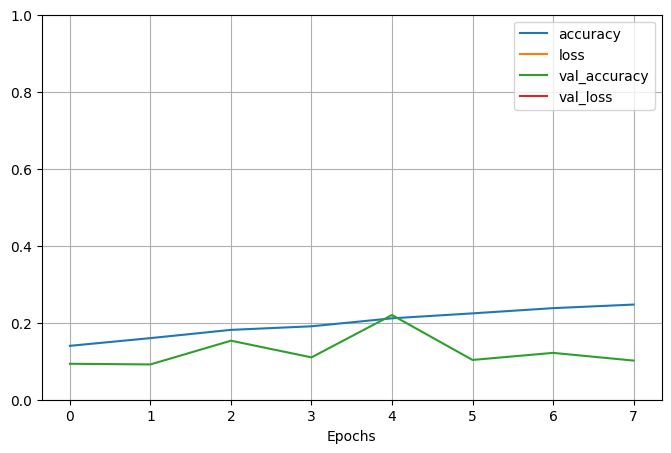

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(povijest.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

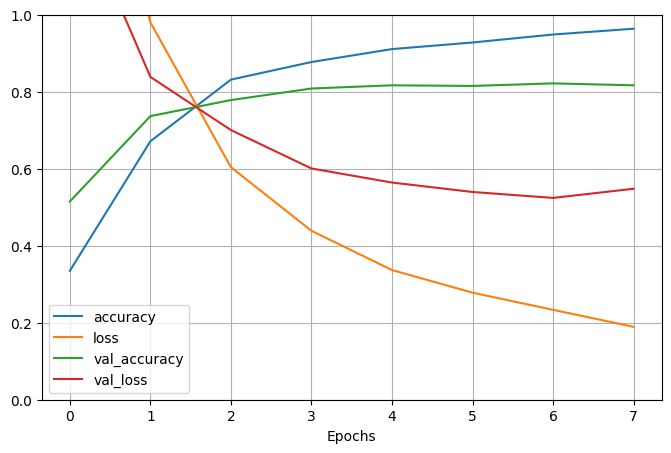

In [28]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(povijest2.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.show

##Zamrzavanje slojeva baznog modela

* težine baznog modela neće se ažurirati tijekom treniranja, odnosno  težine će ostati iste onakve kakve su bile prilikom prethodnog treniranja na ImageNet skupu podataka.

* Često se koristi kada koristimo prethodno trenirane modele kao dio većih modela ili kada želimo koristiti unaprijed trenirane konvolucijske slojeve kao ekstraktore značajki (feature extractor) bez njihovog dodatnog treniranja.


###Vizualizacija

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(povijest2.history).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0, 1)
plt.xlabel('Epochs')
plt.show

# Model Zoo

TensorFlow Model Zoo nudi niz unaprijed obučenih modela koje možete jednostavno koristiti.

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import cv2

# učitaj pre-trenirani model iz TensorFlow Hub
model = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")



# PyTorch Model Zoo
PyTorch Model Zoo provides various models through torchvision and other libraries.

In [ ]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models

# Load the pre-trained model
model = models.resnet50(pretrained=True)
model.eval()

# Detekcija igrača u padelu sa YoloV8 tracking algoritmmom





#### Instalacija

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 454.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 709.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 845.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.9 MB/s eta 0:00:00


#### Testiranje YOLO pose modela

YOLO pose models: https://docs.ultralytics.com/tasks/pose/

YOLO predict input parameters: https://docs.ultralytics.com/modes/predict/#inference-arguments


In [29]:
from ultralytics import YOLO
# load an official model
model2 = YOLO('yolov8l-pose.pt')

# Predict with the model
# Give the frame directory a input
results = model2.track('/content/clip_1.mp4', save=True, save_txt=True, imgsz=1920)

ModuleNotFoundError: No module named 'ultralytics'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#spremiti na disk i promjeniti putanju
!cp runs/pose/track/clip_1.avi /content/drive/MyDrive/Materijali_IS1/clip_1_tracking.avi

In [ ]:
!cp -r runs/pose/track/labels/ /content/drive/MyDrive/Materijali_IS1/clip_1_prediction_track


In [ ]:
!zip -qr clip_1_prediction_track.zip /content/drive/MyDrive/Materijali_IS1/clip_1_prediction_track

YOLO pose format: https://docs.ultralytics.com/datasets/pose/#ultralytics-yolo-format

COCO keypoint classes: ["nose", "left_eye", "right_eye", "left_ear", "right_ear", "left_shoulder", "right_shoulder", "left_elbow", "right_elbow", "left_wrist", "right_wrist", "left_hip", "right_hip", "left_knee", "right_knee", "left_ankle", "right_ankle"]

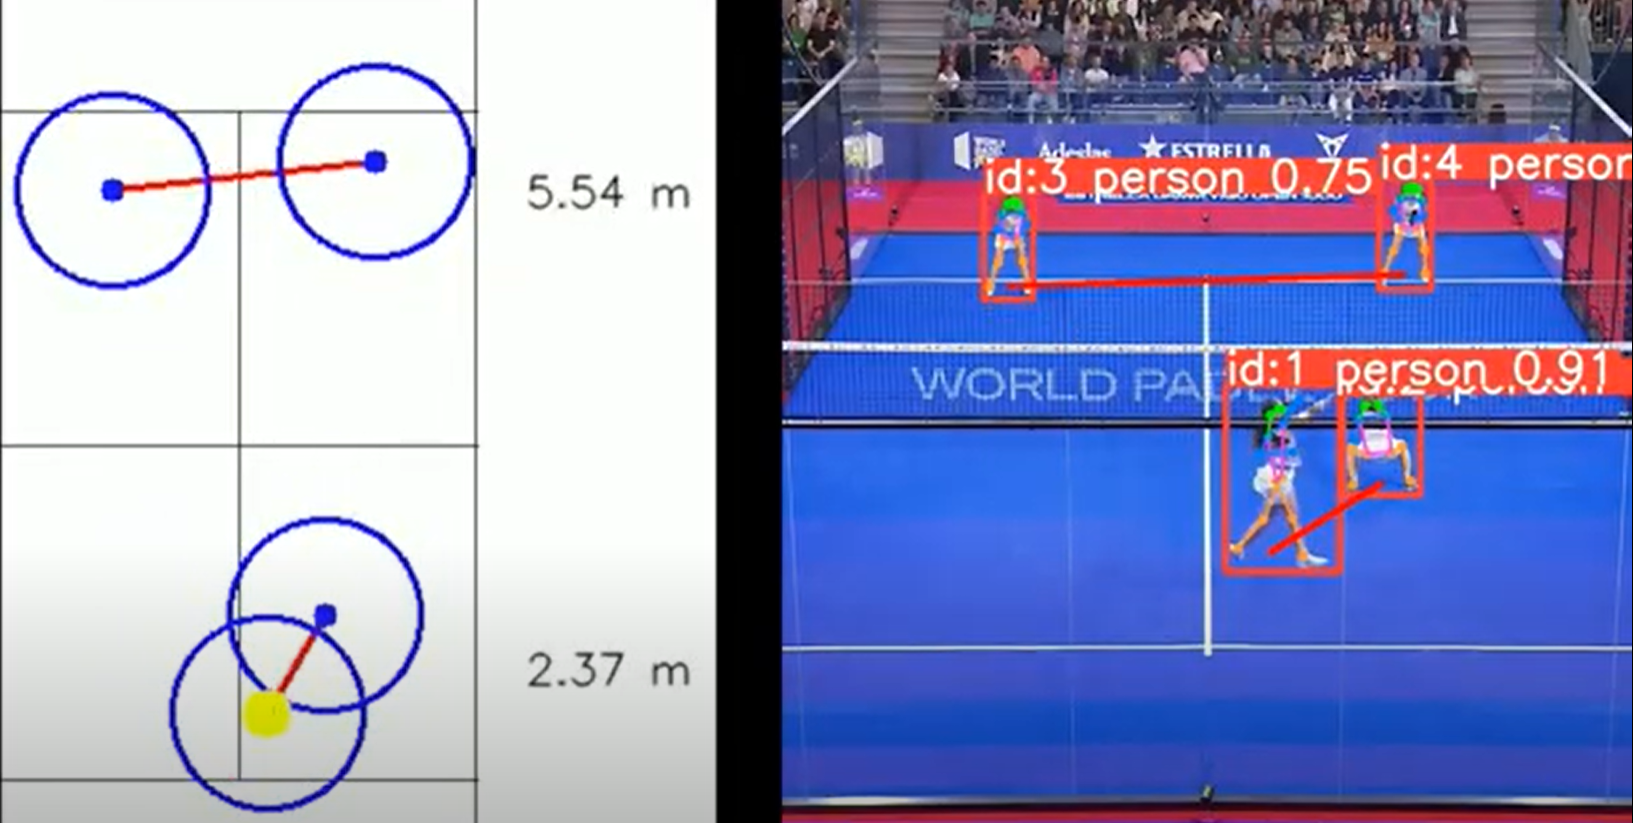